In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('mall.xlsx')

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.drop('CustomerID', axis=1,inplace=True)

In [7]:
df.rename(columns={'Annual Income (k$)': 'Income', 'Spending Score (1-100)': 'Score'}, inplace=True)

In [8]:
df.head()

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [9]:
df.nunique()

Gender     2
Age       51
Income    64
Score     84
dtype: int64

# Visualization

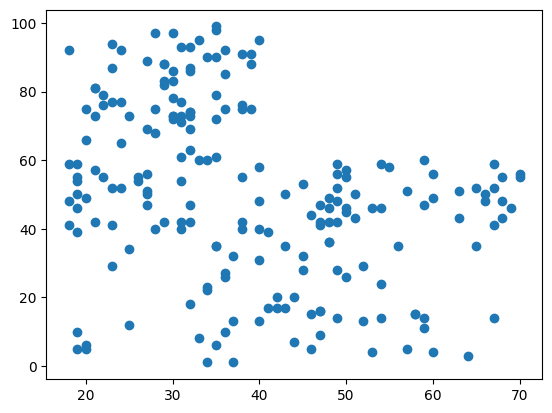

In [10]:
plt.scatter(df.Age,df.Score)

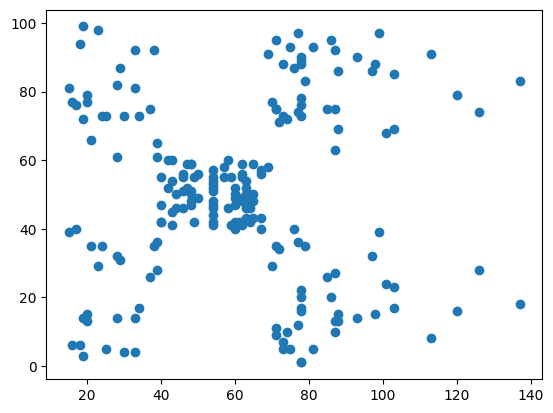

In [12]:
plt.scatter(df.Income,df.Score)

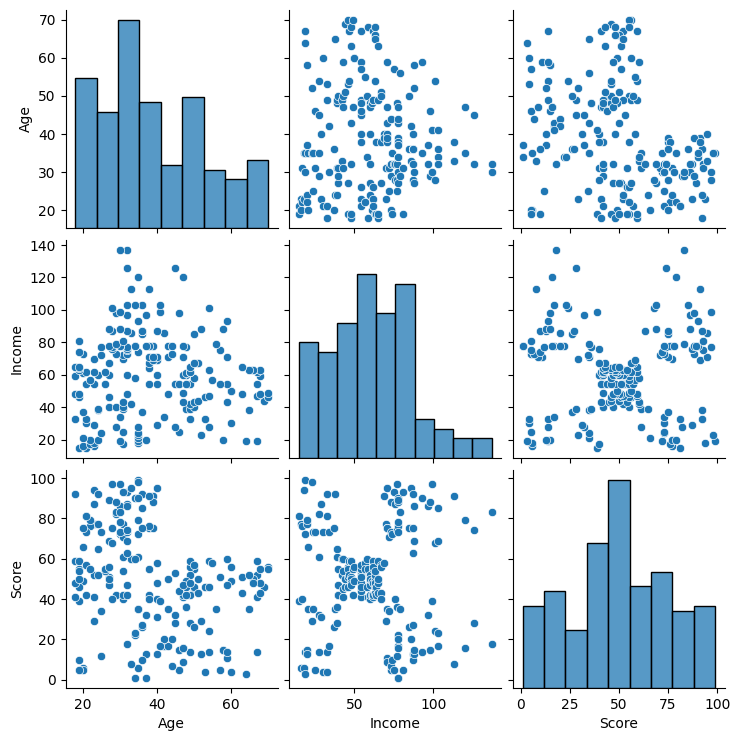

In [14]:
sns.pairplot(df[['Age','Income','Score']])

In [15]:
import sklearn.cluster as cluster

In [16]:
kmeans = cluster.KMeans()

In [17]:
pred = kmeans.fit_predict(df[['Income','Score']])

In [18]:
pred

array([4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5,
       4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 4, 5, 1, 5, 1, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 7, 7, 1, 1, 1, 1,
       1, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 7, 6, 7, 6, 3, 6, 3, 6,
       7, 6, 3, 6, 3, 6, 3, 6, 3, 6, 7, 6, 3, 6, 7, 6, 3, 6, 3, 6, 3, 6,
       3, 6, 3, 6, 3, 6, 7, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6, 3, 6,
       3, 6, 3, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [19]:
df2 = df.copy()

In [20]:
df2.head()

,Gender,Age,Income,Score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [21]:
df2['Predicted'] = pred

In [22]:
df2.head()

,Gender,Age,Income,Score,Predicted
0,Male,19,15,39,4
1,Male,21,15,81,5
2,Female,20,16,6,4
3,Female,23,16,77,5
4,Female,31,17,40,4


In [23]:
centers = kmeans.cluster_centers_
centers

array([[109.7       ,  22.        ],
       [ 47.29545455,  51.40909091],
       [108.18181818,  82.72727273],
       [ 80.18181818,  12.68181818],
       [ 25.14285714,  19.52380952],
       [ 25.0952381 ,  80.04761905],
       [ 78.03571429,  81.89285714],
       [ 63.72093023,  46.1627907 ]])

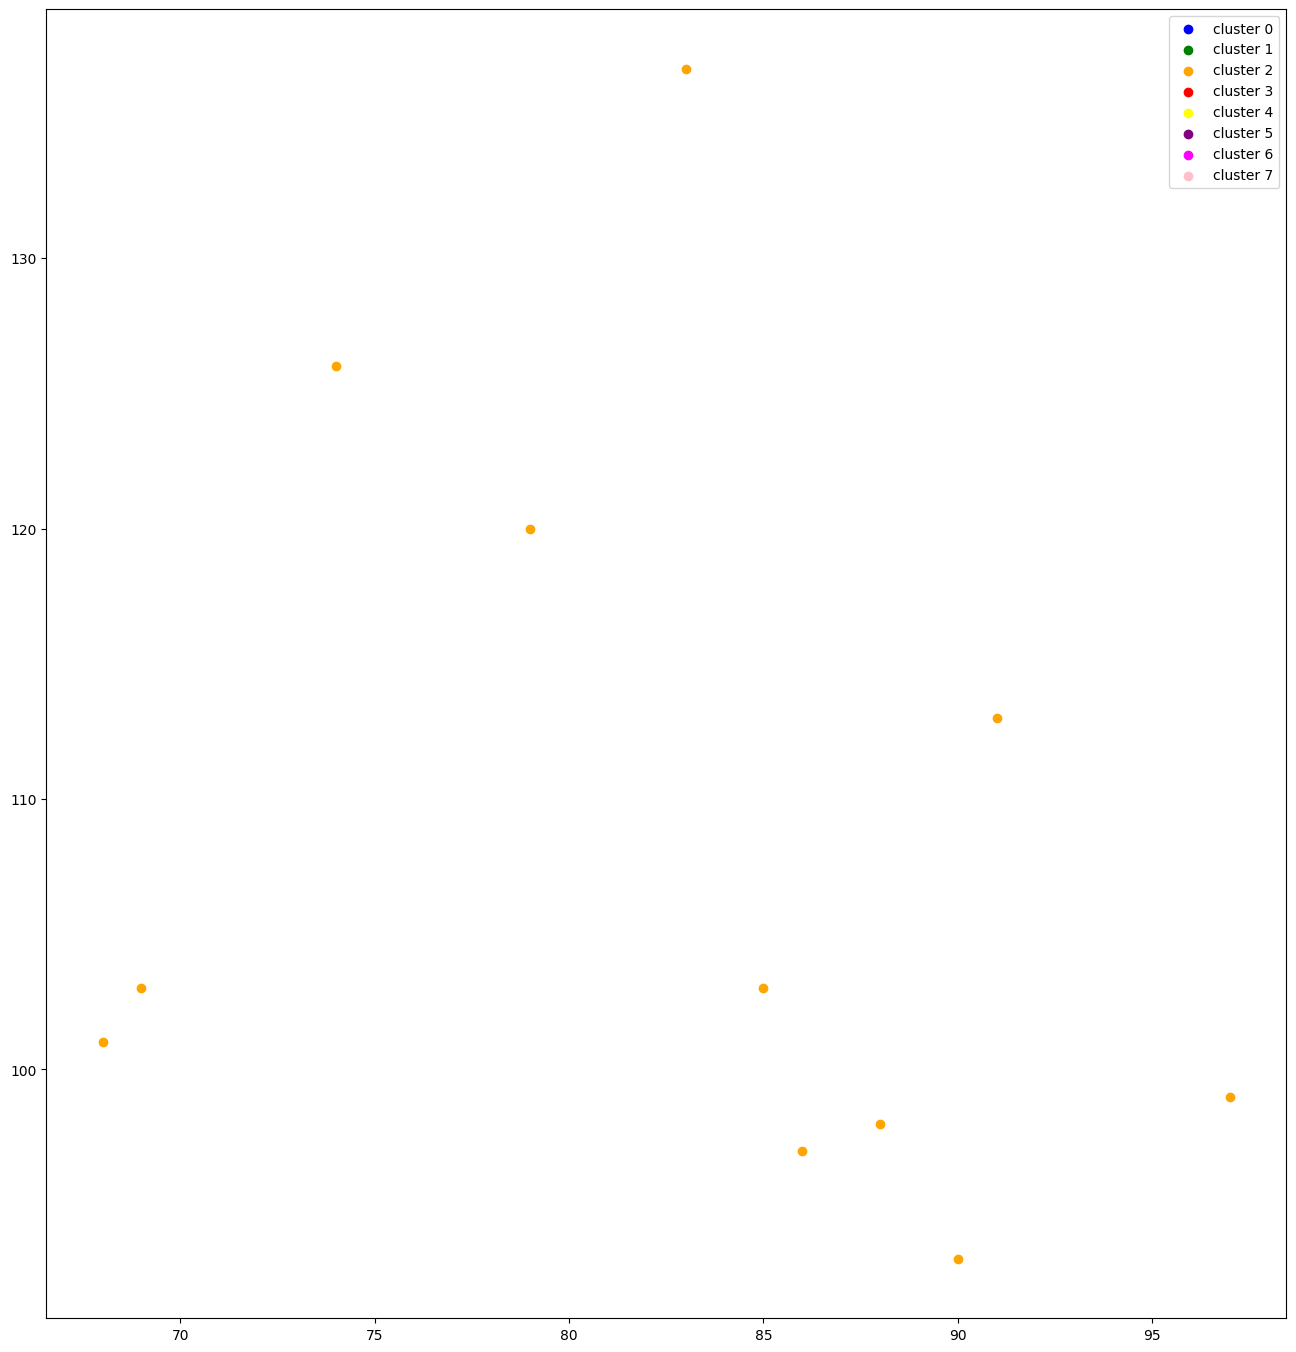

In [54]:
df0 = df2[df2.Predicted==0]
df1 = df2[df2.Predicted==1]
df2 = df2[df2.Predicted==2]
df3 = df2[df2.Predicted==3]
df4 = df2[df2.Predicted==4]
df5 = df2[df2.Predicted==5]
df6 = df2[df2.Predicted==6]
df7 = df2[df2.Predicted==7]

plt.figure(figsize=(15,10))

plt.scatter(df0['Score'],df0['Income'],color='blue',label='cluster 0')
plt.scatter(df1['Score'],df1['Income'],color='green',label='cluster 1')
plt.scatter(df2['Score'],df2['Income'],color='orange',label='cluster 2')
plt.scatter(df3['Score'],df3['Income'],color='red',label='cluster 3')
plt.scatter(df4['Score'],df4['Income'],color='yellow',label='cluster 4')
plt.scatter(df5['Score'],df5['Income'],color='purple',label='cluster 5')
plt.scatter(df6['Score'],df6['Income'],color='fuchsia',label='cluster 6')
plt.scatter(df7['Score'],df7['Income'],color='pink',label='cluster 7')

plt.legend()

In [25]:
df0.head()

,Gender,Age,Income,Score,Predicted
180,Female,37,97,32,0
182,Male,46,98,15,0
184,Female,41,99,39,0
186,Female,54,101,24,0
188,Female,41,103,17,0


In [26]:
df1.head()

,Gender,Age,Income,Score,Predicted
40,Female,65,38,35,1
42,Male,48,39,36,1
43,Female,31,39,61,1
45,Female,24,39,65,1
46,Female,50,40,55,1


In [27]:
df2.head()

,Gender,Age,Income,Score,Predicted
179,Male,35,93,90,2
181,Female,32,97,86,2
183,Female,29,98,88,2
185,Male,30,99,97,2
187,Male,28,101,68,2


In [31]:
df3.head()

,Gender,Age,Income,Score,Predicted


In [29]:
df4.head()

,Gender,Age,Income,Score,Predicted


# Elbow Method

In [45]:
from sklearn.cluster import KMeans

In [46]:
wcss = []

In [49]:
cluster = range(1,15)

for k in cluster:
    kmean = KMeans(n_clusters=k)
    kmean.fit(df[['Income','Score']])
    wcss.append(kmean.inertia_)

In [50]:
wcss

[269981.28,
 181665.82312925172,
 106348.37306211118,
 73679.78903948836,
 44448.45544793371,
 37233.81451071001,
 30273.394312070042,
 25050.832307547527,
 21797.084944646376,
 19742.080965794252,
 17584.473101436386,
 15824.256618219908,
 14794.690523414445,
 13358.078219166455]

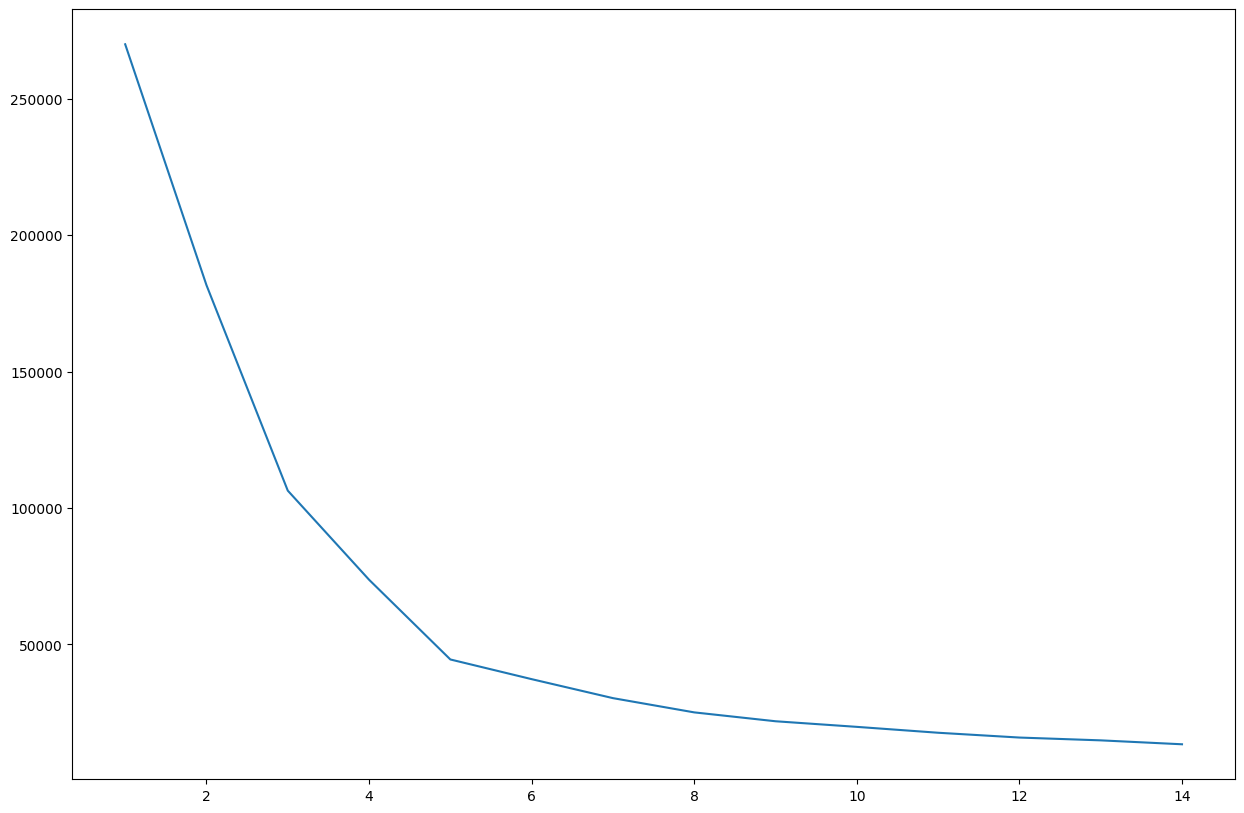

In [52]:
plt.figure(figsize=(15,10))
plt.plot(cluster,wcss)

In [55]:
!pip install kneed

In [56]:
from kneed import KneeLocator

In [57]:
kn = KneeLocator(cluster,wcss,direction='decreasing',curve='convex')

In [58]:
kn

In [59]:
print('optimal number of cluster is: ',kn.knee)

optimal number of cluster is:  5


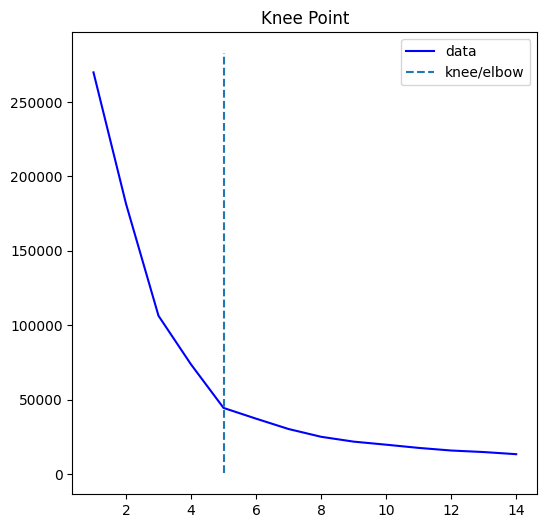

In [60]:
kn.plot_knee()

# After Select Best K

In [61]:
import sklearn.cluster as cluster

In [63]:
kmeans = cluster.KMeans(n_clusters=5)

In [64]:
predicted = kmeans.fit_predict(df[['Income','Score']])
predicted

array([0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1,
       0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 4, 3, 1, 3, 4, 3, 4, 3,
       1, 3, 4, 3, 4, 3, 4, 3, 4, 3, 1, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3])

In [65]:
df['Predicted'] = predicted

In [66]:
df.head()

,Gender,Age,Income,Score,Predicted
0,Male,19,15,39,0
1,Male,21,15,81,2
2,Female,20,16,6,0
3,Female,23,16,77,2
4,Female,31,17,40,0


In [67]:
center2 = kmeans.cluster_centers_
center2

array([[26.30434783, 20.91304348],
       [55.2962963 , 49.51851852],
       [25.72727273, 79.36363636],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571]])

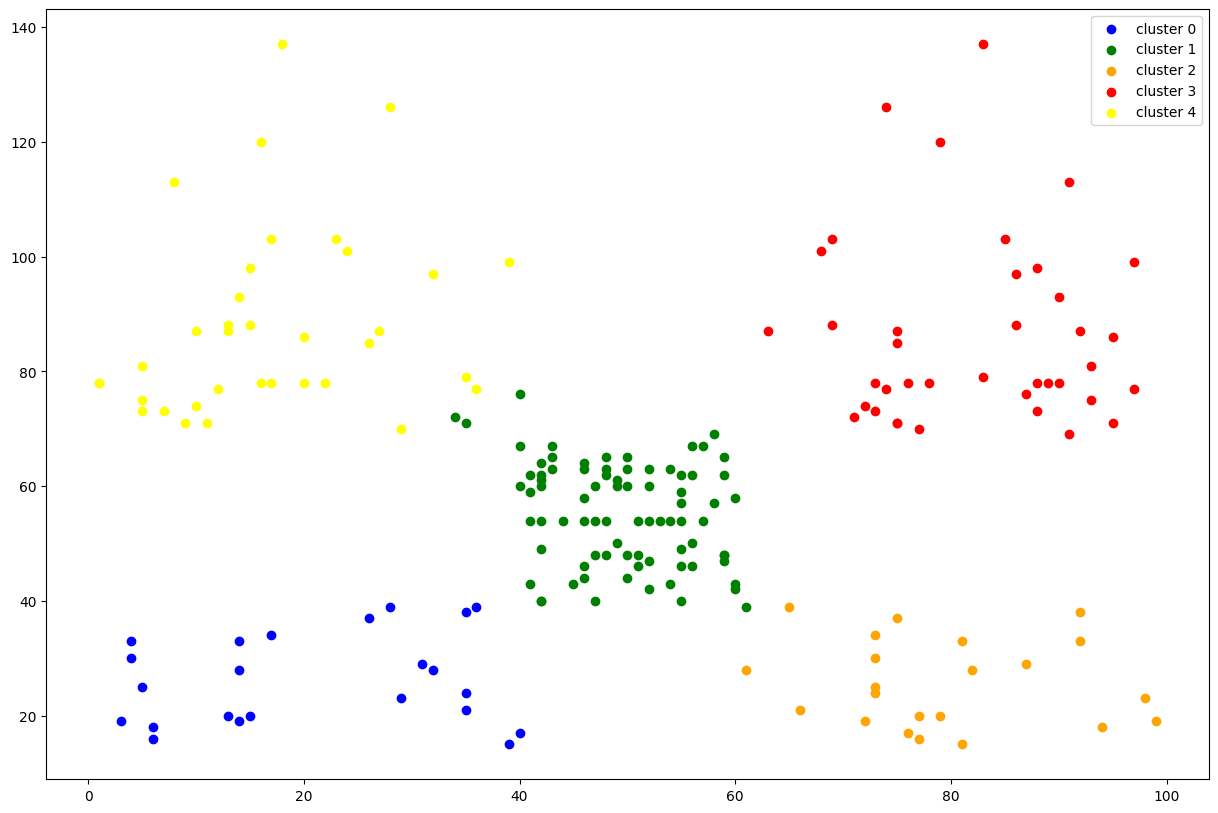

In [68]:
df0 = df[df.Predicted==0]
df1 = df[df.Predicted==1]
df2 = df[df.Predicted==2]
df3 = df[df.Predicted==3]
df4 = df[df.Predicted==4]

plt.figure(figsize=(15,10))

plt.scatter(df0['Score'],df0['Income'],color='blue',label='cluster 0')
plt.scatter(df1['Score'],df1['Income'],color='green',label='cluster 1')
plt.scatter(df2['Score'],df2['Income'],color='orange',label='cluster 2')
plt.scatter(df3['Score'],df3['Income'],color='red',label='cluster 3')
plt.scatter(df4['Score'],df4['Income'],color='yellow',label='cluster 4')

plt.legend()